In [90]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/alvarofavale/week7_ml/refs/heads/main/data/raw/train.csv'
df = pd.read_csv(url)

# Set display option to show all columns
pd.set_option('display.max_columns', None)

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [91]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [92]:
df.shape

(100000, 28)

In [93]:
df.drop_duplicates(inplace=True)
df.shape

(100000, 28)

In [94]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [95]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [96]:
df.shape

(100000, 28)

In [97]:
has_nulls = df.isnull().values.any()

In [98]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [99]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Create the figures folder if it doesn't exist
output_folder = 'figures'
os.makedirs(output_folder, exist_ok=True)

#Thank StackOverflow for teaching me I don't have to keep the plots open in the notebook

# Plot box plots for each numerical column based on credit_score
for col in numerical_df.columns:
    if col != 'credit_score':  # Avoid plotting credit_score against itself
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='credit_score', y=col, data=df)
        plt.title(f'{col} vs Credit Score')
        plt.xlabel('Credit Score')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        
        # Save the plot in the 'figures' folder
        plt.savefig(os.path.join(output_folder, f'{col}_vs_credit_score_boxplot.png'))
        plt.close()  # Close the plot to free memory

# Plot violin plots for each numerical column based on credit_score
for col in numerical_df.columns:
    if col != 'credit_score':  # Avoid plotting credit_score against itself
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='credit_score', y=col, data=df)
        plt.title(f'{col} vs Credit Score')
        plt.xlabel('Credit Score')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        
        # Save the plot in the 'figures' folder
        plt.savefig(os.path.join(output_folder, f'{col}_vs_credit_score_violinplot.png'))
        plt.close()  # Close the plot to free memory

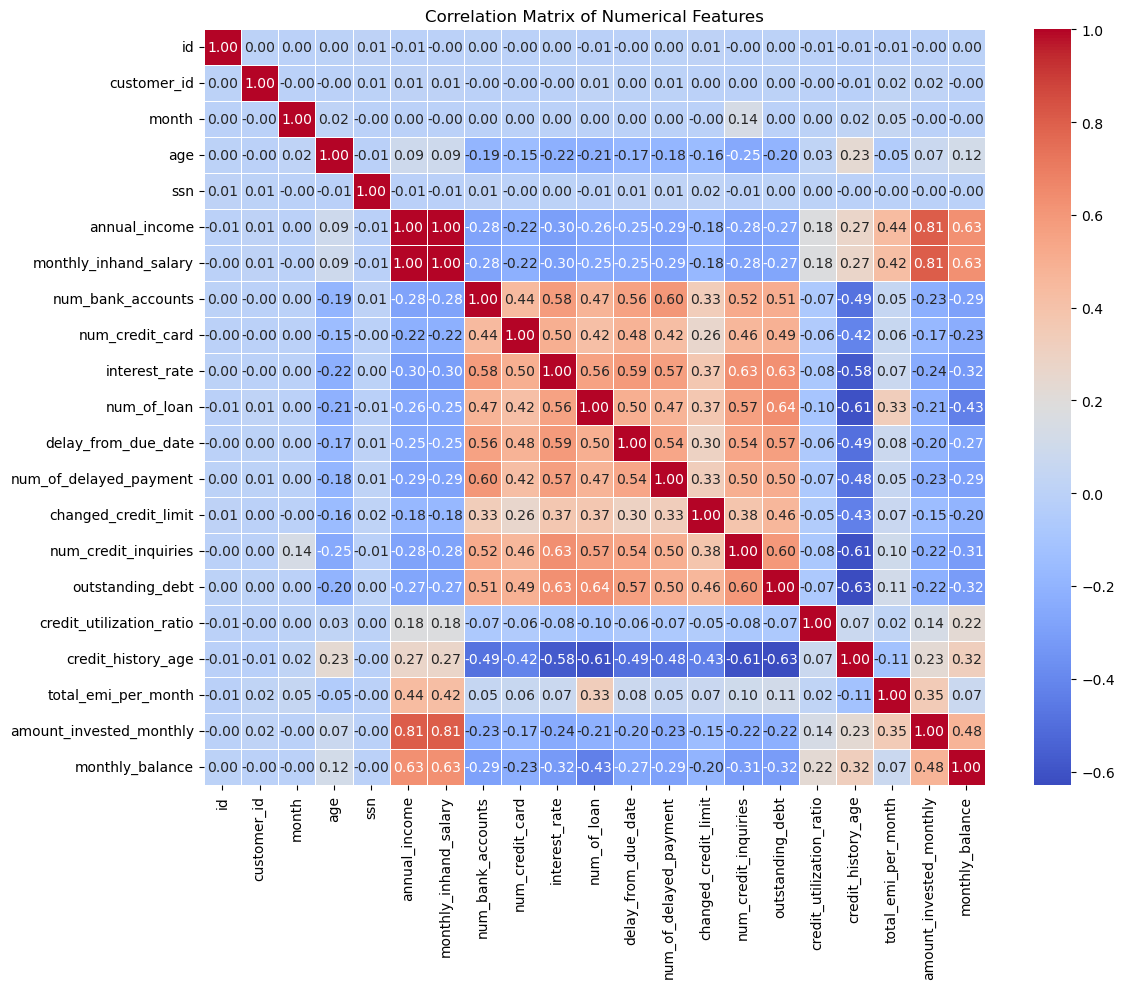

In [100]:
# Create the figures folder if it doesn't exist
output_folder = 'figures'
os.makedirs(output_folder, exist_ok=True)

# 1. Create and plot Correlation Matrix
correlation_matrix = numerical_df.corr()  # Calculate the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()  # Adjust layout to prevent clipping

# Save the correlation matrix plot to the 'figures' folder
plt.savefig(os.path.join(output_folder, 'correlation_matrix.png'))

In [101]:
# Features (all numerical columns except credit_score)
X = numerical_df  # We don't need to drop 'credit_score' from numerical_df anymore
y_class = df['credit_score']  # Target for classification (encoded credit_score)

# Split the data into training and test sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN Classifier (since credit_score is categorical)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train_class)

# Predict and evaluate the KNN Classifier
y_pred_class = knn_classifier.predict(X_test_scaled)
print("KNN Classifier - Classification Report:")
print(classification_report(y_test_class, y_pred_class))

KNN Classifier - Classification Report:
              precision    recall  f1-score   support

        Good       0.67      0.70      0.68      5322
        Poor       0.76      0.77      0.77      8805
    Standard       0.79      0.78      0.78     15873

    accuracy                           0.76     30000
   macro avg       0.74      0.75      0.74     30000
weighted avg       0.76      0.76      0.76     30000



In [102]:
#fully repeated with added encoding 0=Good, 1=Standard, 2=Poor
credit_score_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
df['credit_score_encoded'] = df['credit_score'].map(credit_score_mapping)

# Features (all numerical columns except credit_score)
X = numerical_df  # We don't need to drop 'credit_score' from numerical_df anymore
y_class = df['credit_score_encoded']  # Target for classification (encoded credit_score)

# Split the data into training and test sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN Classifier (since credit_score is categorical)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train_class)

# Predict and evaluate the KNN Classifier
y_pred_class = knn_classifier.predict(X_test_scaled)
print("KNN Classifier - Classification Report:")
print(classification_report(y_test_class, y_pred_class))

KNN Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      5322
           1       0.78      0.79      0.79     15873
           2       0.78      0.75      0.76      8805

    accuracy                           0.76     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.76      0.76      0.76     30000



In [119]:
# Features (all numerical columns except credit_score)
X = numerical_df  # We don't need to drop 'credit_score' from numerical_df anymore
y_reg = df['credit_score_encoded']  # Target for regression (encoded credit_score)

# Split the data into training and test sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN Regressor (since credit_score is continuous now)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train_reg)

# Predict and evaluate the KNN Regressor
y_pred_reg = knn_regressor.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

# Calculate accuracy for regression as the percentage of predictions within a tolerance (e.g., 0.1)
tolerance = 0.1
accuracy = (abs(y_pred_reg - y_test_reg) <= tolerance).mean() * 100  # Percentage of predictions within tolerance

print(f"KNN Regressor - Mean Squared Error: {mse}")
print(f"KNN Regressor - R-squared: {r2}")
print(f"KNN Regressor - Accuracy (within tolerance of {tolerance}): {accuracy:.2f}%")

KNN Regressor - Mean Squared Error: 0.19864400000000002
KNN Regressor - R-squared: 0.5657302764922425
KNN Regressor - Accuracy (within tolerance of 0.1): 30.12%
